In [5]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Graficos
import matplotlib.pyplot as plt

# Prepocesado y Modelado
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import linalg as LA
import os

os.chdir('/Users/Lenovo/Desktop/EBAC')
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('Iris3.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
# Determinar el numero de renglones de la base de datos
index = data.index
renglones = len(index)
renglones

150

In [15]:
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
x = data.loc[:, features].values

In [37]:
labels = data['variety']

In [17]:
# Estadisticas de las variables
data2 = StandardScaler().fit_transform(x)
data2

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [19]:
# Calcular la matriz de correlaciones para la matriz transformada
A = (1/renglones) * np.dot(data2.T,data2)
A

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [21]:
# Entrenamiento del modelo de PC con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(x)

# Se extrae el m0delo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

print('Eigenvalores:')
results = LA.eigvals(A)
print(results)

Eigenvalores:
[2.91849782 0.91403047 0.14675688 0.02071484]


In [23]:
# Porcentaje de la varianza explicada por cada nuevo componente
print('Porcentaje de varianza explicada por componente')
print(modelo_pca.explained_variance_ratio_)

Porcentaje de varianza explicada por componente
[0.72962445 0.22850762 0.03668922 0.00517871]


In [31]:
# Calculos de los eigenvectores
print('Eigenvectores (por renglon):')
pd.DataFrame(data = modelo_pca.components_,
             columns = features,
             index = ['PC1', 'PC2', 'PC3', 'PC4'])

Eigenvectores (por renglon):


,sepal.length,sepal.width,petal.length,petal.width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [39]:
# Proyecciones de los componentes
proyecciones = np.dot(modelo_pca.components_, data2.T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(labels)
proyecciones

,PC1,PC2,PC3,PC4
variety,,,,
Setosa,-2.264703,0.480027,-0.127706,-0.024168
Setosa,-2.080961,-0.674134,-0.234609,-0.103007
Setosa,-2.364229,-0.341908,0.044201,-0.028377
Setosa,-2.299384,-0.597395,0.091290,0.065956
Setosa,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
Virginica,1.870503,0.386966,0.256274,-0.389257
Virginica,1.564580,-0.896687,-0.026371,-0.220192
Virginica,1.521170,0.269069,0.180178,-0.119171


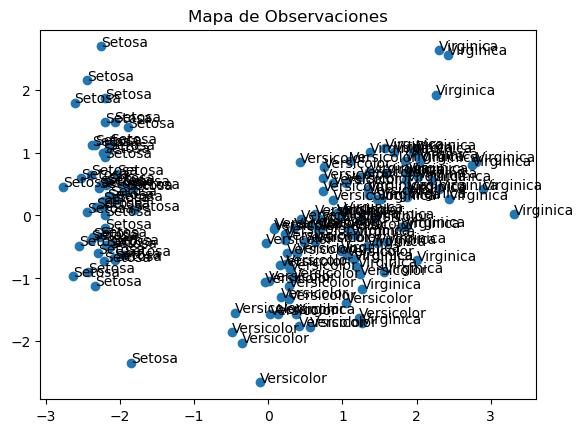

In [54]:
# Tomamos las primeras dos variables porque son las que tienen mas peso de acuerdo al porcentaje de varianza calculado.
x = proyecciones.iloc[:,0]
y = proyecciones.iloc[:,1]
z = labels
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title('Mapa de Observaciones')
ax.scatter(x,y)

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))

In [45]:
# Creamos los agrupamientos de las materias
componentes_2 = pd.DataFrame(data = modelo_pca.components_,
                            columns = features,
                            index = ['PC1', 'PC2', 'PC3', 'PC4'])

componentes_2 = componentes_2.iloc[0:2, :]
componentes_2 = componentes_2.T
componentes_2

,PC1,PC2
sepal.length,0.521066,0.377418
sepal.width,-0.269347,0.923296
petal.length,0.580413,0.024492
petal.width,0.564857,0.066942


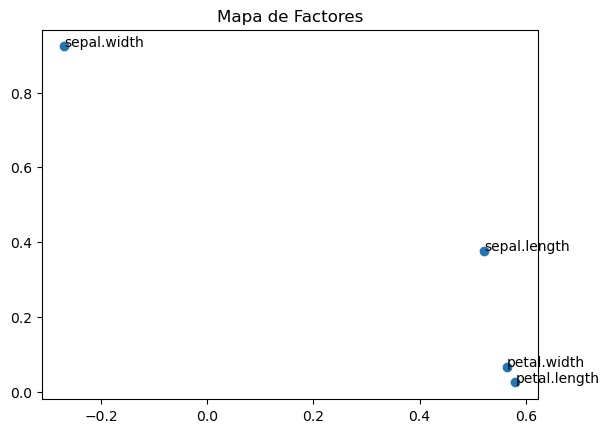

In [47]:
# Graficamos los agrupamientos de las materias
x = componentes_2.iloc[:,0]
y = componentes_2.iloc[:,1]
z = componentes_2.index
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title('Mapa de Factores')
ax.scatter(x,y)

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))

# Razonamiento entre Mapa de observaciones y Mapa de factores:
Podemos conlcuir que los grupos que se formaron con cada observacion estan relacionados hacia las posiciones que tenemos cada una de las caracteristicas, podemos ver que se agrupan SepaL Length, Petal Width y Petal Length hacia la derecha muy cerca del eje X ( en donde se concentra Versicolor y Virginica), al contrario del Sepal Width que esta en el eje negativo de las X y mas alejado de este mismo (en donde se concentra el tipo Setosa).

# Corroborar resultados de muestras aleatorias

In [59]:
print(data.iloc[55])
print(data.iloc[123])
print(data.iloc[20])

sepal.length           5.7
sepal.width            2.8
petal.length           4.5
petal.width            1.3
variety         Versicolor
Name: 55, dtype: object
sepal.length          6.3
sepal.width           2.7
petal.length          4.9
petal.width           1.8
variety         Virginica
Name: 123, dtype: object
sepal.length       5.4
sepal.width        3.4
petal.length       1.7
petal.width        0.2
variety         Setosa
Name: 20, dtype: object


# Conclusiones
Podemos concluir que el Sepal Width puede definir la variedad de Setosa, tomando en cuenta el modelo realizado y la comparacion con una muestra aleatoria, a mayor tamaño, nos inclinamos hacia la variedad de Setosa.
Mismos casos considerando Sepal Leng